In [6]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from scipy import ndimage, misc

In [7]:
## loading sample images
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')

dataset = np.array([china, flower], dtype=np.float32)
batchsize, height, width, channels = dataset.shape


/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``im

In [8]:
dataset.shape

(2, 427, 640, 3)

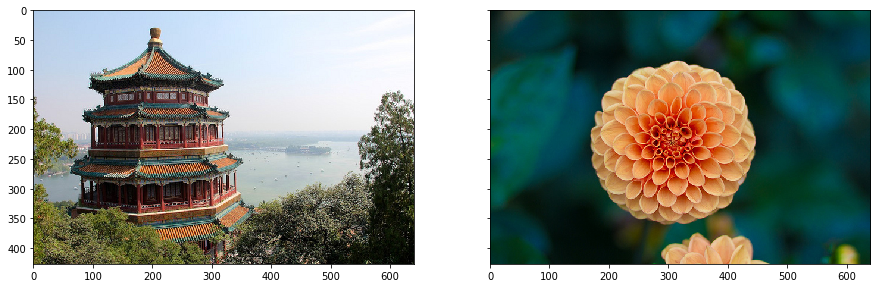

In [9]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,15))
ax1.imshow(china)
ax2.imshow(flower)

In [21]:
# create 2 filters
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] =1 # vertical filter
filters[3,:,:,1] =1 # Horizontal filter
## create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape =(None,height,width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict = {X: dataset})

## Information on what tf.nn.conv2D does -

X is the input mini-batch (a 4D tensor)
Filters are set of filters is apply which is also a 4D tensor.

Stride is a 4 element 1D array, where two central elements are the vertical and horrizontal Strides, first and last elements currently must be equal to 1.

Padding must be set to "VALID" or "SAME"

VALID - Convolution layer doesnt use zero padding
SAME - Convolution layer uses zero padding.


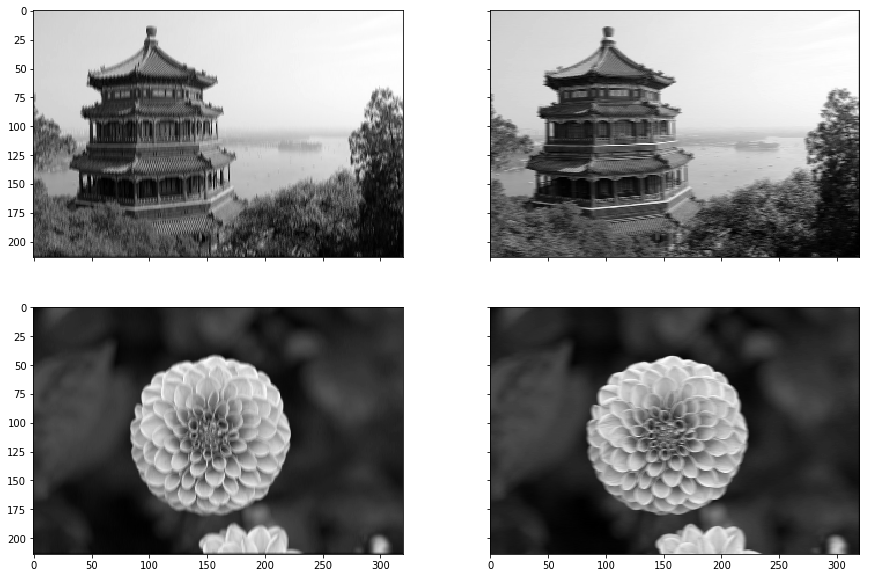

In [77]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15,10))
ax1.imshow(output[0,:,:,0],cmap="gray")
ax2.imshow(output[0,:,:,1],cmap="gray")
ax3.imshow(output[1,:,:,0],cmap="gray")
ax4.imshow(output[1,:,:,1],cmap="gray")

In [94]:
# fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15,10))
# a = ndimage.zoom(output[0,:,:,0],10.0)
# b = ndimage.zoom(output[0,:,:,1],10.0)
# c = ndimage.zoom(output[1,:,:,0],6.0)
# d = ndimage.zoom(output[1,:,:,1],6.0)
# ax1.imshow(a)
# ax2.imshow(b)
# ax3.imshow(c)
# ax4.imshow(d)
# plt.show()